# Seoul Bike Sharing Demand

## Model training

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
#reading the dataframe
data_frame=pd.read_csv('final_input_data.csv')

In [31]:
data_frame.head()

,Temperature(°C),Dew point temperature(°C),Wind speed (m/s),Humidity(%),Visibility (10m),Hour,Rented Bike Count
0,-5.2,-17.6,2.2,37,2000,0,254
1,-5.5,-17.6,0.8,38,2000,1,204
2,-6.0,-17.7,1.0,39,2000,2,173
3,-6.2,-17.6,0.9,40,2000,3,107
4,-6.0,-18.6,2.3,36,2000,4,78


### ML model to be used:
**Since, the output is a continuos data. We use regression algorithms**

- Linear Regression
- RandomForestRegressor
- DecisionTreeRegressor
- XGBRegressor
- Keras Sequential(DL)

In [32]:
#import ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [33]:
#spliting the data
x=data_frame.iloc[:,:-1]
y=data_frame.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [36]:
initial_models=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),XGBRegressor()]
model_names=['Linear regression','Random Forest Regressor','Decision Tree Regressor','XGBRegressor']

In [37]:
from sklearn import metrics

In [73]:
import pickle
#to_save the model

r2_score for test data: 0.44650625486760276
r2_score for train data: 0.4580606544435918
Mean Absolute Error: 352.07731416987264
Mean Squared Error: 225792.61821293077
Root Mean Sqaured Error: 475.17640746666996
Visualizations


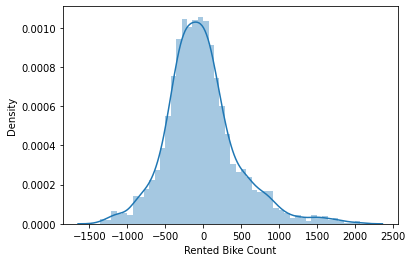

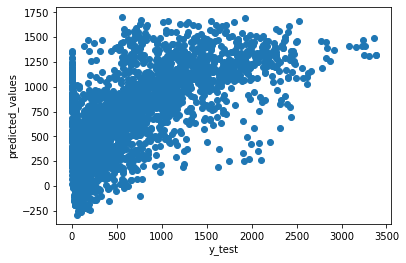

--------------------------------------------------------------------------------------------
r2_score for test data: 0.7313791723696181
r2_score for train data: 0.964487940656737
Mean Absolute Error: 200.31912861491625
Mean Squared Error: 109581.36475901825
Root Mean Sqaured Error: 331.03076104648983
Visualizations


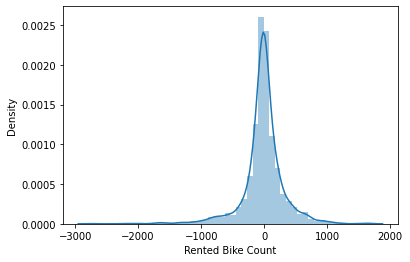

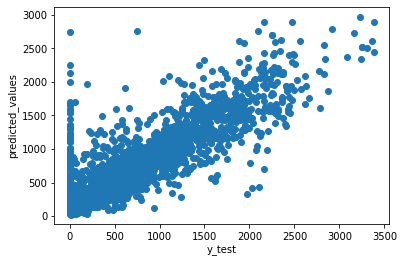

--------------------------------------------------------------------------------------------
r2_score for test data: 0.4456431163074578
r2_score for train data: 1.0
Mean Absolute Error: 268.6088280060883
Mean Squared Error: 226144.72754946726
Root Mean Sqaured Error: 475.546766942503
Visualizations


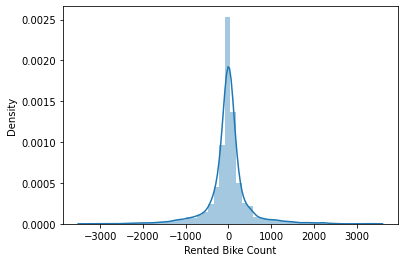

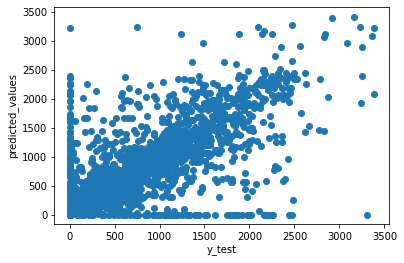

--------------------------------------------------------------------------------------------
r2_score for test data: 0.7059286057529789
r2_score for train data: 0.9435631419494221
Mean Absolute Error: 211.77927634420504
Mean Squared Error: 119963.68636953436
Root Mean Sqaured Error: 346.3577433370508
Visualizations


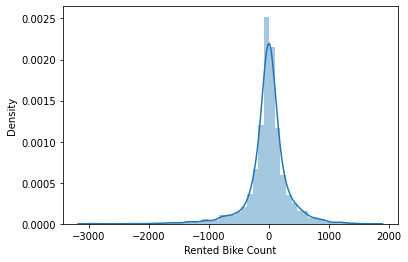

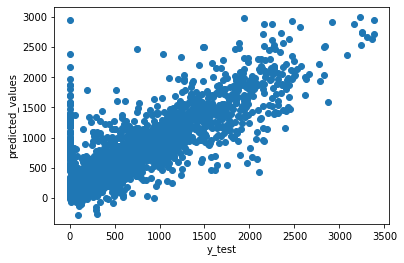

--------------------------------------------------------------------------------------------


In [74]:
scores=[]
for model,name in zip(initial_models,model_names):
    trained_model=model.fit(x_train,y_train)
    r2_score_test_data=model.score(x_test,y_test)
    scores.append(r2_score_test_data)
    r2_score_train_data=model.score(x_train,y_train)
    predicted_values=trained_model.predict(x_test)
    print('r2_score for test data:',r2_score_test_data)
    print('r2_score for train data:',r2_score_train_data)
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted_values))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted_values))
    print('Root Mean Sqaured Error:',np.sqrt(metrics.mean_squared_error(y_test,predicted_values)))
    print('Visualizations')
    sns.distplot(y_test-predicted_values)
    plt.show()
    plt.scatter(y_test,predicted_values)
    plt.xlabel('y_test')
    plt.ylabel('predicted_values')
    plt.show()
    print('--------------------------------------------------------------------------------------------')
    #saving the model
    with open('seoul_bike_share_demand_'+name+'.pkl','wb') as file:
        pickle.dump(trained_model,file)

In [45]:
model_scores=pd.DataFrame({'Model Name':model_names,'Accuracy':scores})

In [46]:
model_scores

,Model Name,Accuracy
0,Linear regression,0.446506
1,Random Forest Regressor,0.728868
2,Decision Tree Regressor,0.466364
3,XGBRegressor,0.705929


**Compared to other ML models, RandomForestRegressor gives more accuracy**

## Hyperparameter tuning for RandomForestRegressor

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
new_rfr_model=RandomForestRegressor()

In [48]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [49]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
#initialzing the RandomSearchCV model
random_cv=RandomizedSearchCV(estimator=new_rfr_model,param_distributions=param_grid,scoring='neg_mean_squared_error',n_iter=100,cv=5,verbose=10)

In [54]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, score=-118855.265, total=   3.5s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, score=-139541.777, total=   3.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, score=-139663.052, total=   3.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.9s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, score=-138039.737, total=   3.4s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.3s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, score=-131620.842, total=   3.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.7s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=20, score=-93357.644, total=   7.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.2s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=20, score=-105680.699, total=   7.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   31.7s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=20, score=-104815.828, total=   7.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   39.2s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=20, score=-109401.035, total=   7.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   46.8s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=20, score=-111701.687, total=   7.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-99872.471, total=   2.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-113357.686, total=   2.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-111139.379, total=   2.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=sq

[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, score=-95381.877, total=   8.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, score=-107787.634, total=   8.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, score=-106213.345, total=   8.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, score=-109293.471, total=   8.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_d

[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, score=-114005.680, total=   2.2s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, score=-110214.594, total=   2.2s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, score=-120958.552, total=   2.2s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, score=-115573.595, total=   2.2s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_f

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, score=-140727.953, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, score=-137840.934, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, score=-131955.257, total=   0.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-101846.460, total=   3.6s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqr

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, score=-119776.872, total=   0.3s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, score=-115431.398, total=   0.3s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-135467.528, total=   1.3s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-150578.404, total=   1.3s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=10, max_features=sqr

[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=20, score=-125784.215, total=   2.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, score=-95068.162, total=   7.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, score=-106029.181, total=   7.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, score=-105202.823, total=   7.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max

[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10, score=-101203.232, total=   5.6s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10, score=-121369.836, total=   5.6s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10, score=-119780.115, total=   5.7s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10, score=-125771.898, total=   5.6s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=100, min_samp

[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, score=-107873.587, total=   4.3s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, score=-106740.898, total=   4.0s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, score=-110801.046, total=   4.1s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, score=-112619.074, total=   4.1s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=au

[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25, score=-106623.009, total=   6.0s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25, score=-110882.189, total=   5.9s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25, score=-112278.658, total=   5.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=-136540.647, total=   1.3s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, score=-110882.099, total=   0.7s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, score=-112930.956, total=   0.7s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, score=-93886.801, total=   3.4s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, score=-110433.556, total=   3.3s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features

[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=-114897.501, total=   1.0s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, score=-110290.402, total=   2.8s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, score=-127224.095, total=   3.0s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, score=-122916.023, total=   3.0s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=1

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=5, score=-135710.213, total=   1.5s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=5, score=-149679.871, total=   1.5s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=5, score=-147450.571, total=   1.5s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=5, score=-154226.978, total=   1.5s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=5,

[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, score=-106438.796, total=   4.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, score=-104566.176, total=   4.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, score=-109047.417, total=   4.9s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, score=-112668.799, total=   5.1s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_featur

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, score=-105259.581, total=   3.3s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, score=-109907.707, total=   3.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, score=-112773.660, total=   3.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-100774.833, total=   3.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sq

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 29.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=10)

In [55]:
random_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [56]:
random_cv.best_score_

-103842.18545107005

In [75]:
#saving random_cv model of Randomforestregressor
with open('seoul_bike_sharing_demand_random_cv_rfr.pkl','wb') as file:
    pickle.dump(random_cv,file)

In [64]:
new_model=RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=15)

In [65]:
new_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=1000)

In [66]:
new_model.score(x_test,y_test)

0.7373531764592933

## Training sklearn.neuralnetworks model 

In [71]:
from sklearn.neural_network import MLPRegressor

In [68]:
nn_model=MLPRegressor()

In [69]:
nn_model.fit(x_train,y_train)

MLPRegressor()

In [70]:
nn_model.score(x_test,y_test)

0.5328636584557804

**The intial RandomForestRegressor model performs well than the other models**